<a href="https://colab.research.google.com/github/BharatSingla12/Bike_Sharing_Demand_Prediction_ML_Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#  <u>**Exploratory data analysis** </u>

## **Importing the all the libraies and mounting the drive**

In [ ]:
# Import all the libraries 
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Lets take a glimpse of the overall data and each column individually**

In [ ]:
# Load the playstore data 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Supervised ML - Regression Project/SeoulBikeData.csv", encoding= 'unicode_escape')

# Lets view the overall data
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Convert the date in datetime format 
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
# Lets view again 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


In [ ]:
# Lets find the number of NaN values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
dtype: int64

In [ ]:
# Get the description of all the numeric and datetime columns
df.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Rented Bike Count,8760.0,704.602055,0.0,191.0,504.5,1065.25,3556.0,644.997468
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


In [103]:
df_grp = df.drop(['Date','Hour','Month'], axis = 1).groupby(by= ['Seasons'], as_index=True).mean().T
df_grp['Mean']=df_grp.mean(axis=1)
df_grp = df_grp.round(decimals=2)
df_grp

Seasons,Autumn,Spring,Summer,Winter,Mean
Rented Bike Count,819.60,730.03,1034.07,225.54,702.31
Temperature(°C),14.12,13.05,26.58,-2.54,12.80
Humidity(%),59.23,58.78,64.98,49.74,58.18
Wind speed (m/s),1.49,1.87,1.61,1.92,1.73
Visibility (10m),1560.75,1240.36,1501.75,1445.99,1437.21
Dew point temperature(°C),5.50,4.12,18.75,-12.42,3.99
Solar Radiation (MJ/m2),0.52,0.69,0.76,0.30,0.57
Rainfall(mm),0.12,0.18,0.25,0.03,0.15
Snowfall (cm),0.06,0.00,0.00,0.25,0.08


In [ ]:
# Get list of all the categorical columns
catagorical_columns = df.select_dtypes(include=[object]).columns.to_list()
# catagorical_columns.append('Hour')
# catagorical_columns.append('Month')

print("The categorical columns are:")
for i in catagorical_columns:
    print('-> ' + i)   

The categorical columns are:
-> Seasons
-> Holiday
-> Functioning Day


In [ ]:
# Get list of all the numerical columns
Continuous_columns  = df.select_dtypes(include=np.number).columns.to_list()
Continuous_columns.remove('Hour')
Continuous_columns.remove('Month')
print("The numerical columns are:")
for i in Continuous_columns:
    print('-> ' + i)

The numerical columns are:
-> Rented Bike Count
-> Temperature(°C)
-> Humidity(%)
-> Wind speed (m/s)
-> Visibility (10m)
-> Dew point temperature(°C)
-> Solar Radiation (MJ/m2)
-> Rainfall(mm)
-> Snowfall (cm)


In [ ]:
# Get the list of unique values of categorical columns with their frequencies
print('The unique values of categorical columns with their frequencies are: \n')
for i in catagorical_columns:
    print(df[i].value_counts())
    print("="*35 + "||")

The unique values of categorical columns with their frequencies are: 

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
===================================||
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
===================================||
Yes    8465
No      295
Name: Functioning Day, dtype: int64
===================================||


In [ ]:
# Check for the duplicate columns
print(f"The duplicate columns are {df.duplicated().sum()}.")

The duplicate columns are 0.


## **Conclusion**: 
1. The data is properly formated.
2. There is no null null values.
3. There is no duplicate values.
4. There are 3 categorical columns and 10 numerical columns.

## **Finding the insights, patterns and relations**

### Univariant Variable Analysis

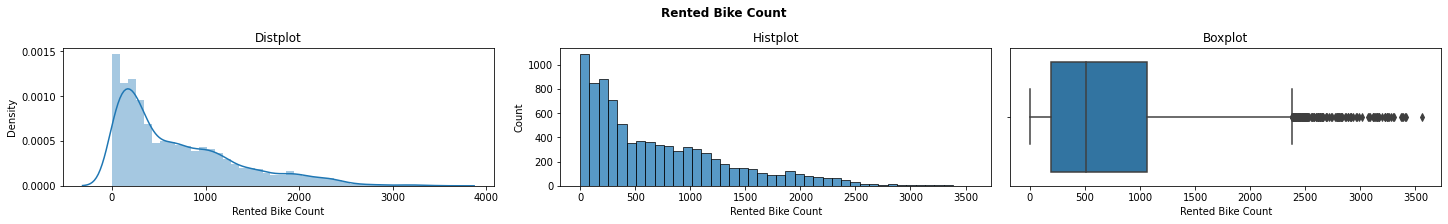

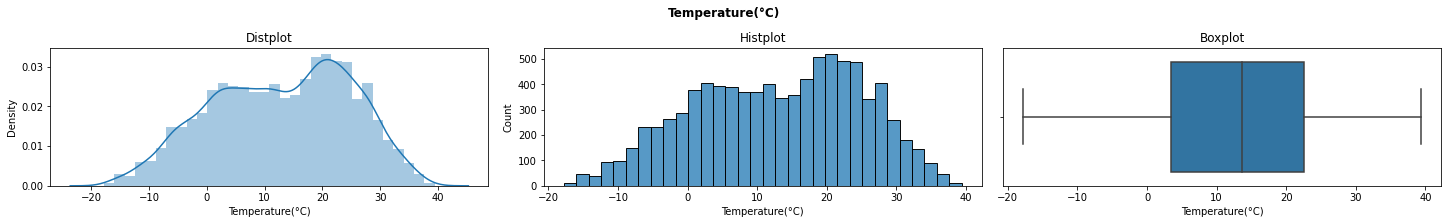

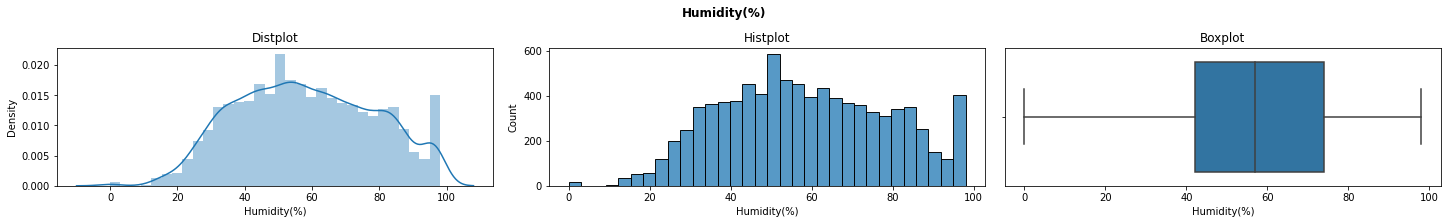

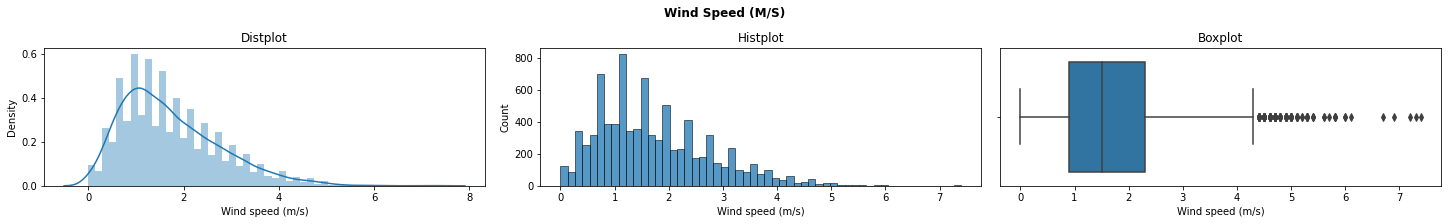

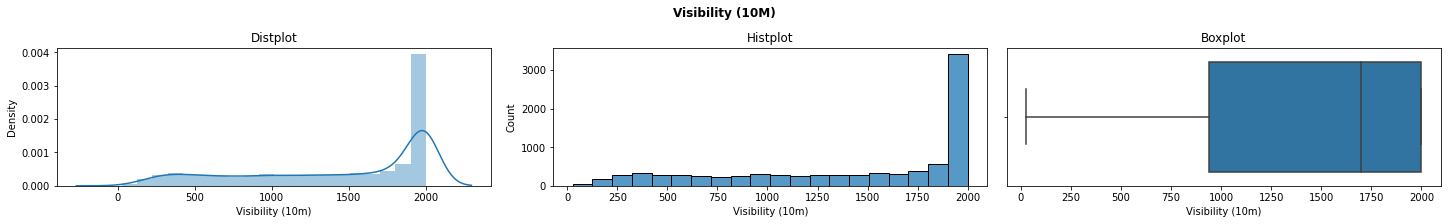

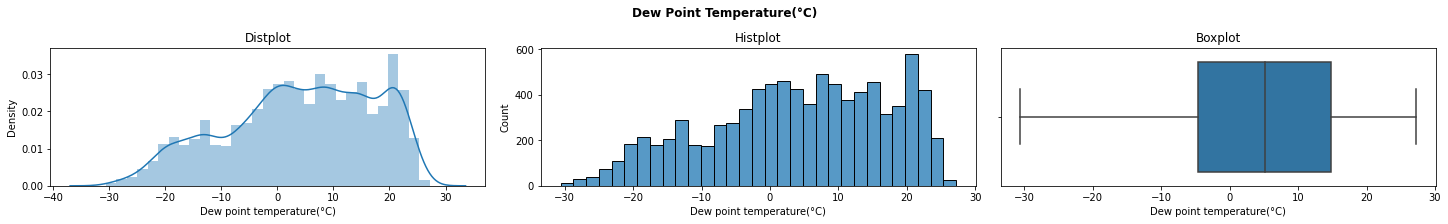

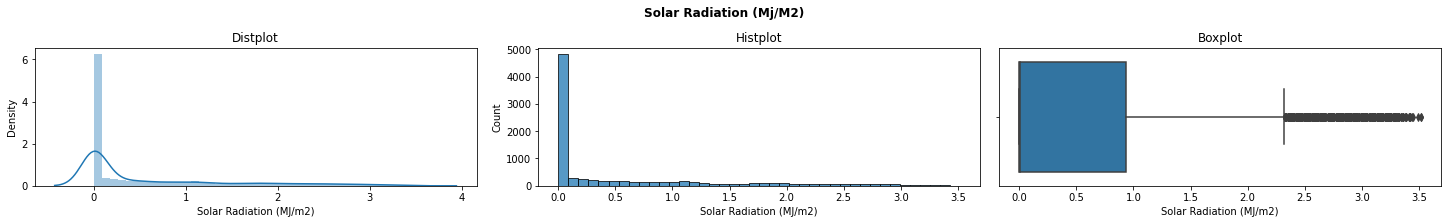

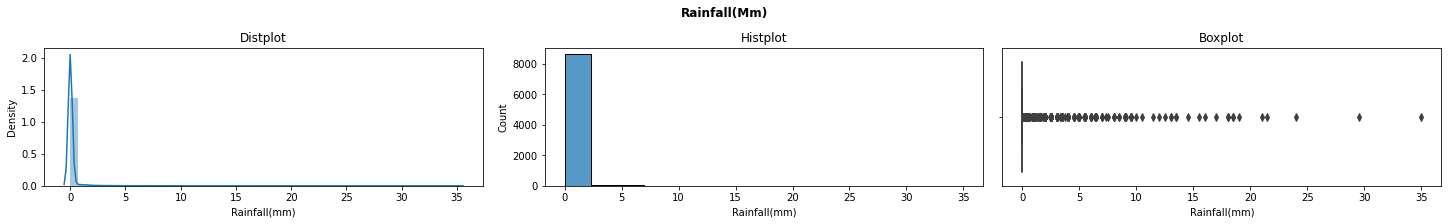

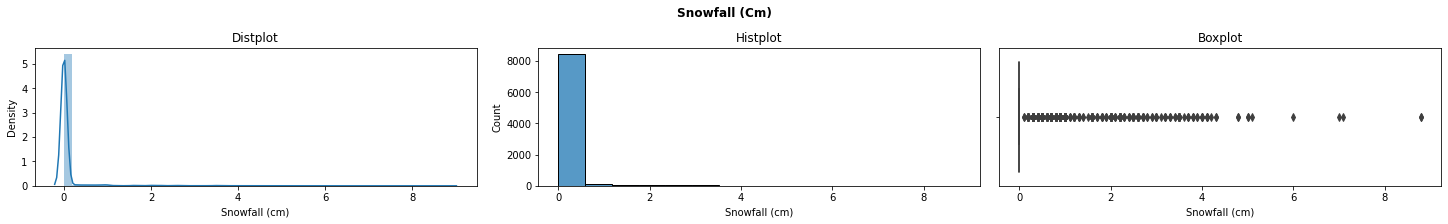

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
#Plotting Graphs Before treating outliers 
for col in Continuous_columns:
  fig, ax =plt.subplots(1,3, constrained_layout=True)
  fig.set_size_inches(20, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
  sns.histplot(df[col], ax=ax[1]).set(title="Histplot")
  sns.boxplot(df[col], ax=ax[2]).set(title="Boxplot")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

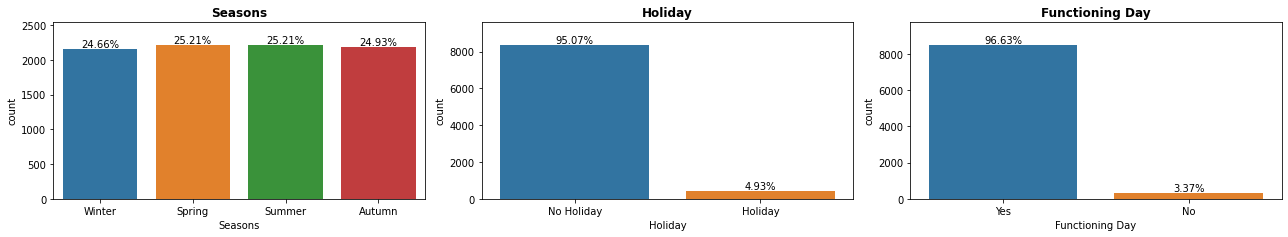

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')
    

# Defining r to autofit the number and size of plots
r = int(len(catagorical_columns)/3 +1)


# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

### Bivariant Variable Analysis

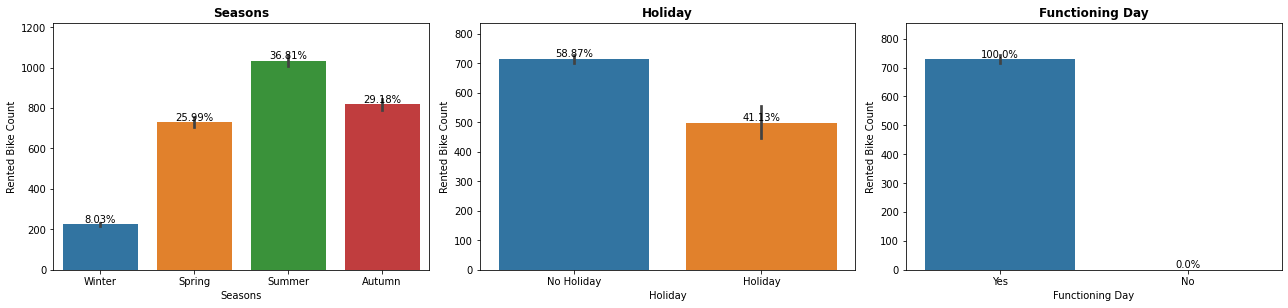

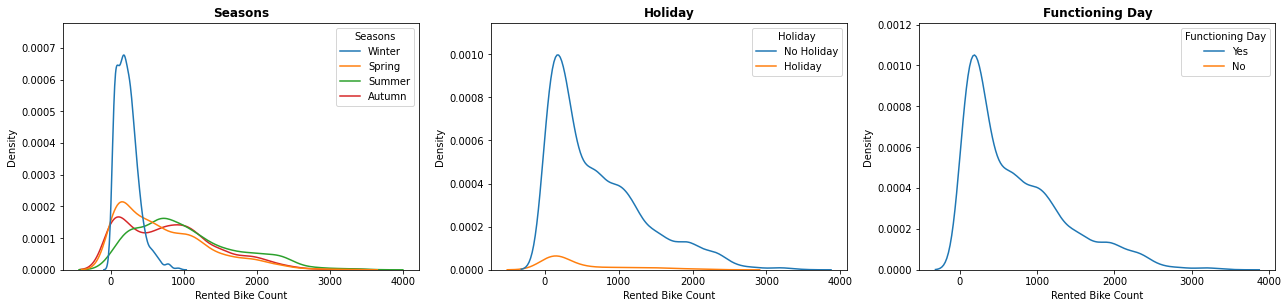

In [ ]:
plt.figure(figsize=(18,20))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(5,3,n+1)
  sns.barplot(x=df[column], y="Rented Bike Count", data=df).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

# plt.figure(figsize=(18,20))
# for n,column in enumerate(catagorical_columns):
#   plot = plt.subplot(5,3,n+1)
#   sns.stripplot(x=df[column], y="Rented Bike Count", data=df).margins(y=0.15)
#   plt.title(f'{column.title()}',weight='bold')
#   plt.tight_layout()

plt.figure(figsize=(18,20))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(5,3,n+1)
  sns.kdeplot(data=df, x='Rented Bike Count', hue=df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

  

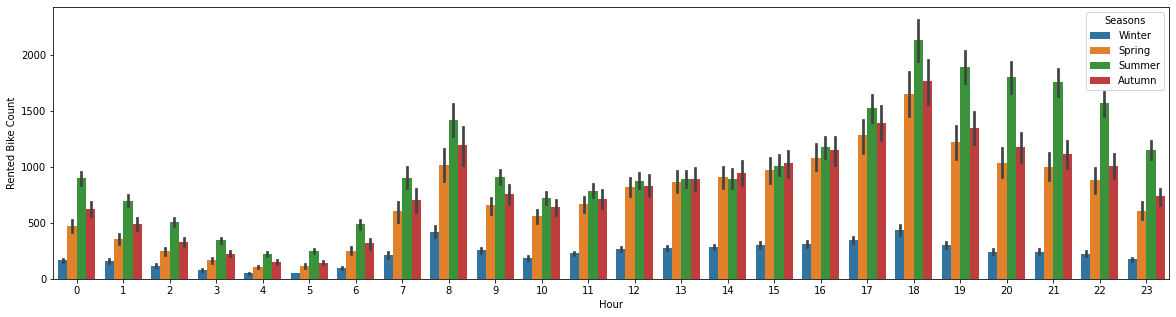

In [ ]:
# Bar plot of mean rented bike each Hour
plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
sns.barplot(x="Hour", y="Rented Bike Count", data=df, hue = 'Seasons')
# annot_percent(plot)

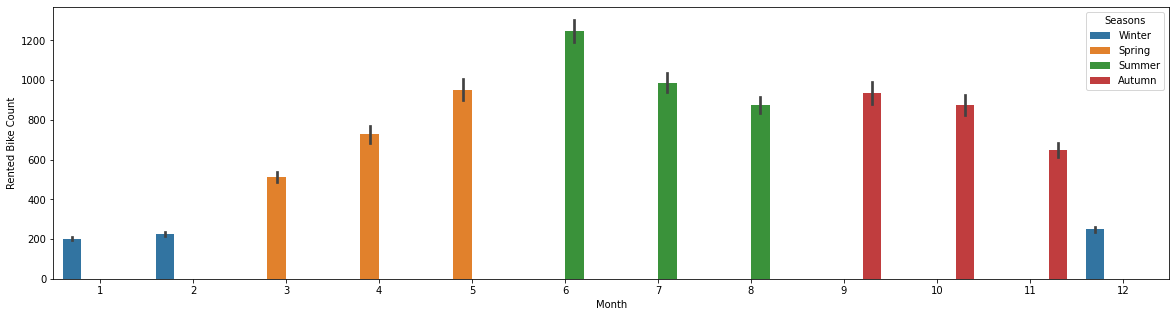

In [ ]:
plt.figure(figsize=(20,5))
plot = plt.subplot(1,1,1)
sns.barplot(x="Month", y="Rented Bike Count", data=df,  hue = 'Seasons')
plt.show()

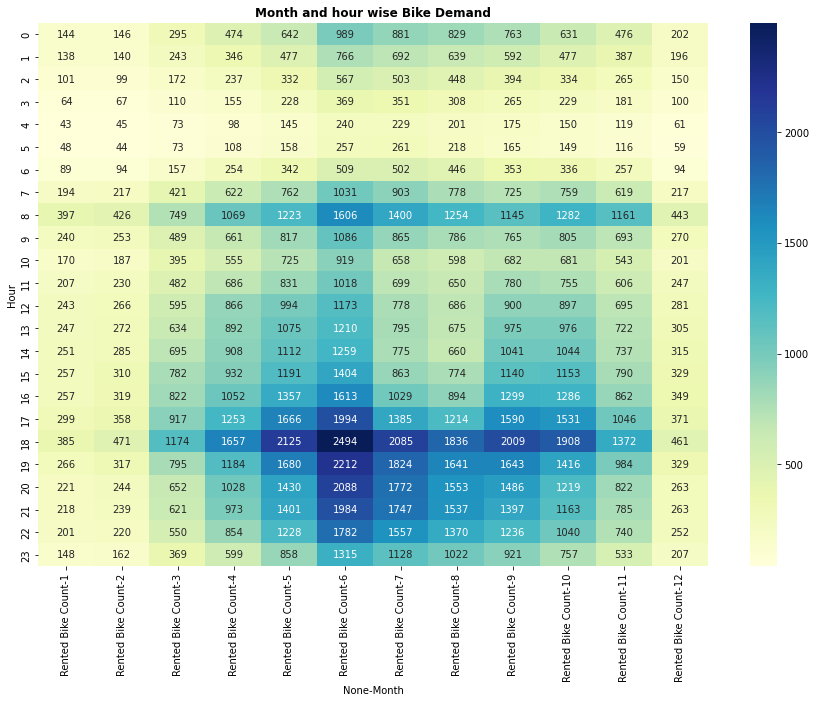

In [ ]:
df_Mth_hur_dmd = df.pivot_table(index='Hour', columns='Month', values=['Rented Bike Count'], aggfunc=np.mean).astype('int')

plt.figure(figsize=(15,10))
plot = sns.heatmap(df_Mth_hur_dmd, annot=True, fmt="d", vmin = 40, cmap="YlGnBu")
plt.title('Month and hour wise Bike Demand', weight='bold')
# plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.show()

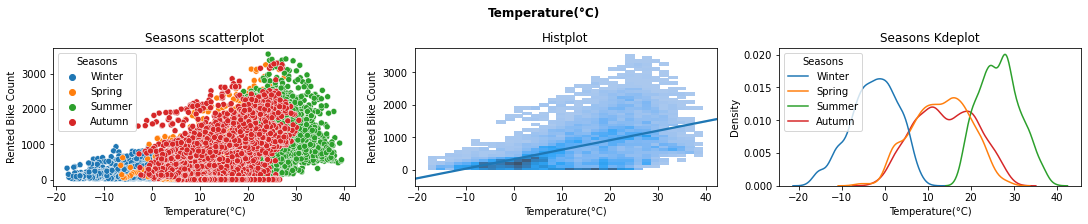

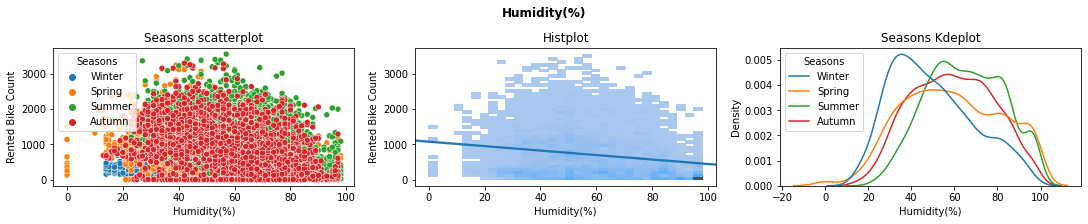

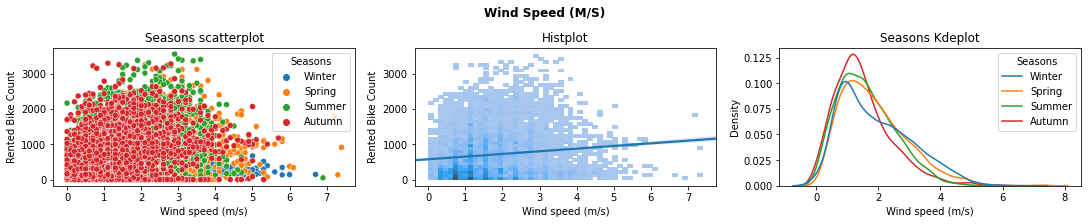

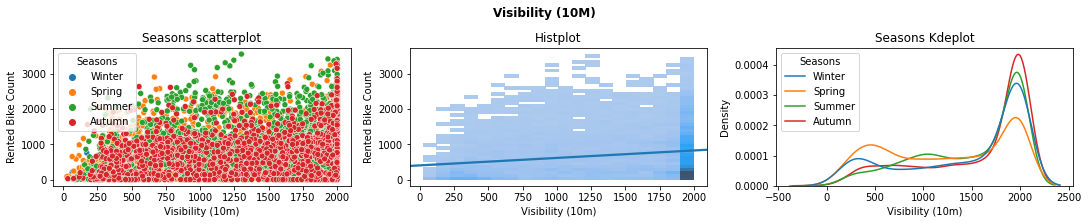

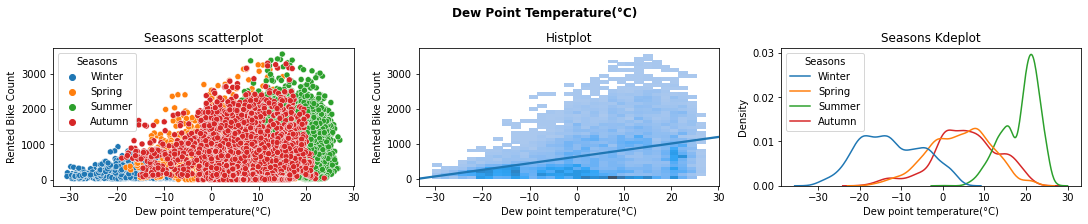

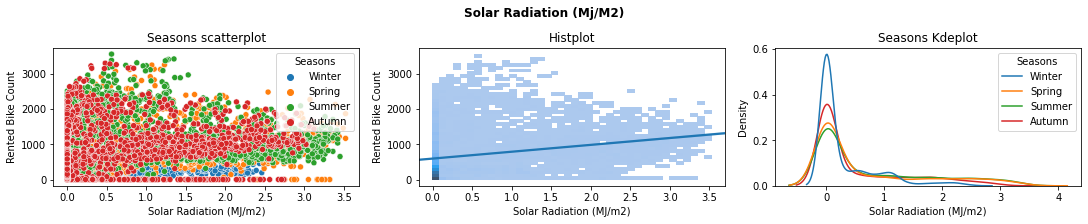

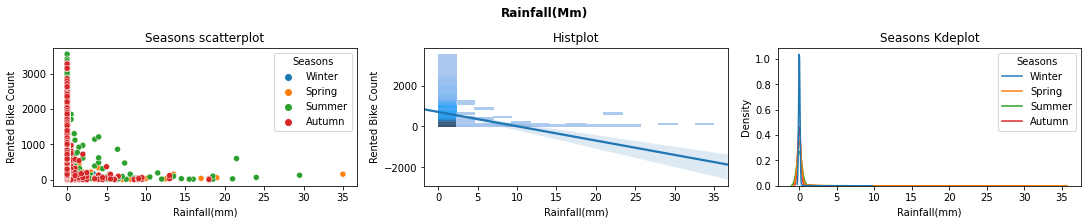

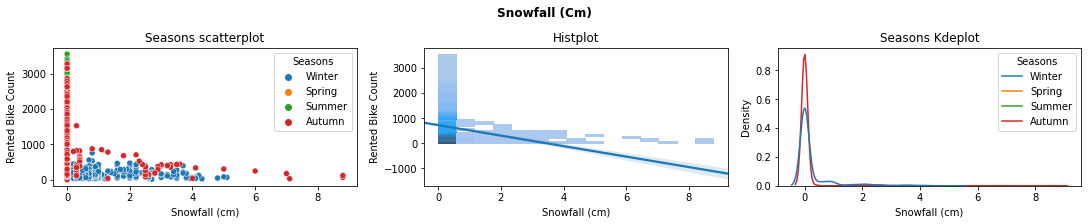

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
#Plotting Graphs Before treating outliers 
for col in Continuous_columns[1:]:
  fig, ax =plt.subplots(1,3, constrained_layout=True)
  fig.set_size_inches(15, 3)

  sns.scatterplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[0], hue = 'Seasons').set(title="Seasons scatterplot")
  sns.histplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[1]).set(title="Histplot")
  sns.regplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[1], scatter = False, truncate=False)
  sns.kdeplot(data=df, x=df[col], hue="Seasons", ax=ax[2]).set(title="Seasons Kdeplot")

#   sns.lineplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[1], hue = 'Seasons').set(title="lineplot")
#   sns.displot(data=df, x=df[col], hue="Seasons", kind="kde", ax=ax[2]).set(title="Displot")
#   sns.histplot(x=df[col], y="Rented Bike Count", data=df, ax=ax[1], hue = 'Seasons').set(title="Histplot")
#   sns.jointplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="jointplot")
#   sns.JointGrid(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="JointGrid")
#   sns.kdeplot(data=df, x=df[col], y="Rented Bike Count", fill=True, ax=ax[2]) #.set(title="kdeplot")

  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show() 

# # Plot Joint plot
# for col in Continuous_columns:  #df.describe().columns
#   g = sns.JointGrid(data=df, x=col, y="Rented Bike Count", hue = 'Seasons')
#   g.plot(sns.scatterplot, sns.kdeplot)
#   fig.show()

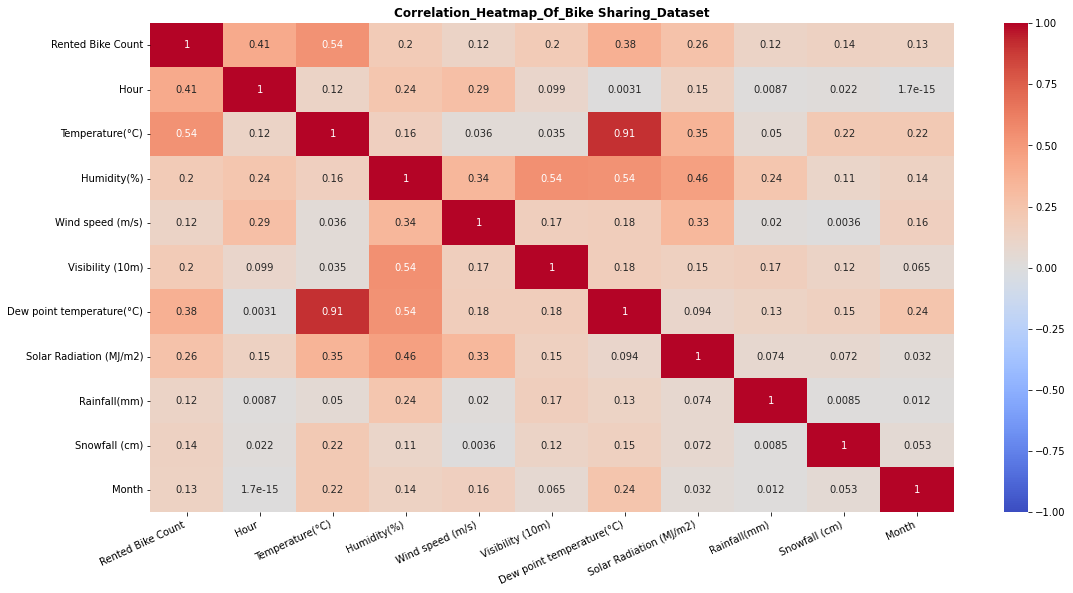

In [ ]:
# Correlation Analysis
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm',vmin=-1)
plt.title('Correlation_Heatmap_Of_Bike Sharing_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.show()

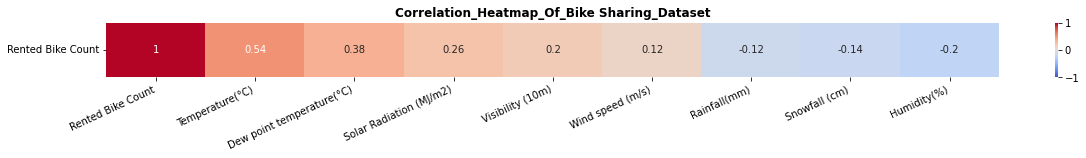

In [ ]:
# Correlation Analysis only for target variabel 
Target_corr  = df[Continuous_columns].corr().loc[:, 'Rented Bike Count'].to_frame().sort_values(by = 'Rented Bike Count' , ascending=False).T
plt.figure(figsize=(20,1))
plot = sns.heatmap(Target_corr, annot=True, cmap='coolwarm', vmin = -1)
plt.title('Correlation_Heatmap_Of_Bike Sharing_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

## **Conclusion**

**Univariable analsis:**
- The Rented Bike count is right skewed, it means there are only few times when the demand of bikes is very high.
- The hours are evenly distibuted.
- The Temperature, and Humidity are alsmost symetrically distributed.
- The wind speed is right distributed, it means that there are sometimes when the windspeed is high.
- The visibility is left skewed, it means there are sometimes when the visibility is low.
- Dew point temperature is slightly left distributed.
- Solar radiation is right distributed, so there are sometimews when the solar radiation is very high.
- The Rainfall is also right distributed, so there are sometimews when the rainfall is very high.
- The snowfall is also right distributed, so there are sometimews when the snowfall is very high.
Here the most of the variable are skewed, which probably are the reason for the skewness in the rented bikes.

- There are 95.07% times no holiday.
- The functioning day are 96.63%. 
- There are a total of 4 seasons each carries the same weightage.


**Barplot of mean rented bikes and season:**
- The demand is very high in summer and lowest in winter.
- Demand: Summer > Autumn > Spring > Winter 
- The demand in summer is 36.8% and demand in spring is 26% and in Autumn is 29% but demand in winter is just 8.03%. 

**Barplot of mean demand and Holiday:**
- The average per hour demand in non holiday is 58.87% and in Holiday is 41.13%.

**Barplot of mean rented bikes and month:**
- The demand is very high in 6th month and very low in the 1st month.
- The demand increases from low to high and decreases gradually from high to low..

**Barplot of mean rented bikes and hour:**
- The demand is very high around 8 and 18 and the demand is very low around 4, and 10. 
- The demand increase and decrease gradually.
- The demand is low at 4 and then it gradually increases till 8 and aftward it gradually decreases till 10 and then again gradually increase till 18 and then gradually decreases till 4.
- For all the seasons, the demand is follows the above pattern. So, it means that the demand of bikes is not much influenced by the change in daily weather 


**Weater analysis - Scatter plot:**
By scatter plot it is clear that some of weather paramete are very linear in nature to demand but some are not. To get clear picture, we can use correlation heatmap.

**Weater analysis - Correlation matrix**
- The temperature, and Dew point temperature are very highly positive correlated to the rented bikes so the demand of bikes increases as the temperature or dew point temperature increaes.
- The solar radiation, and visibility positively correlated to the rented bikes so the demand of bikes increases if the solar radiation or visibility increases.
- The wind speed is little positively correlated to the rented bikes.
- The rainfall, Snowfall, and Humidity are negative correlated to the rented bikes so the demand of bikes decreases if the rainfall, Snowfall, or Humidity increases.

- **Positive correlated:** Temperature > Dew point temperature > Solar Radiation > Visibility > Wind

- **Negative correlated:** Rainfall > Snowfall > Humidity

#  <u>**Apply Machine learning algorithms** </u>